In [1]:
# SDOT Collision Data - Analysis
# This dataset contains records of reported collisions between January 1, 2004 to November 7, 2025
# Name: Maisara Mackeen
# Refer to GitHub README for more information (https://github.com/aminahmackeen/sdotcollisionproject)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Check

In [3]:
df = pd.read_csv("./sdot_collision_comp.csv.xz", compression='xz') 
df.head()

,object_id,status,address_type,location,severity_code,severity_desc,collision_type,person_ct,ped_ct,ped_cycle_ct,...,road_cond,light_cond,speeding_ind,st_col_code,st_col_desc,seglane_key,crosswalk_key,hit_parked_car_ind,source_report_code,source_desc
0,73437202,Matched,Block,SW MORGAN ST BETWEEN 37TH AVE SW AND 38TH AVE SW,1,Property Damage Only Collision,Parked Car,3,0,0,...,Dry,Dark - Street Lights On,0,32.0,One parked--one moving,0,0,0,PTCR,Police Traffic Collision Report
1,73437203,Matched,Intersection,DENSMORE AVE N AND N 39TH ST,1,Property Damage Only Collision,Angles,2,0,0,...,Wet,Daylight,0,10.0,Entering at angle,0,0,0,PTCR,Police Traffic Collision Report
2,73437204,Matched,Block,4TH AVE BETWEEN CHERRY ST AND COLUMBIA ST,1,Property Damage Only Collision,Rear Ended,2,0,0,...,Dry,Daylight,0,13.0,From same direction - both going straight - bo...,0,0,0,PTCR,Police Traffic Collision Report
3,73437205,Matched,Intersection,1ST AV S BR NB AND EAST MARGINAL WAY S,1,Property Damage Only Collision,Angles,2,0,0,...,Dry,Daylight,0,10.0,Entering at angle,0,0,0,PTCR,Police Traffic Collision Report
4,73437206,Matched,Intersection,15TH AVE NW AND NW 53RD ST,2,Injury Collision,Head On,2,0,0,...,Dry,Dawn,0,30.0,From opposite direction - all others,0,0,0,PTCR,Police Traffic Collision Report


In [4]:
df.shape

(214902, 32)

In [5]:
df.columns

Index(['object_id', 'status', 'address_type', 'location', 'severity_code',
       'severity_desc', 'collision_type', 'person_ct', 'ped_ct',
       'ped_cycle_ct', 'vehicle_ct', 'injury_ct', 'serious_injury_ct',
       'fatal_ct', 'inc_date', 'inc_datetime', 'junction_type',
       'sdot_col_code', 'sdot_col_desc', 'inattention_ind', 'und_infl_ind',
       'weather', 'road_cond', 'light_cond', 'speeding_ind', 'st_col_code',
       'st_col_desc', 'seglane_key', 'crosswalk_key', 'hit_parked_car_ind',
       'source_report_code', 'source_desc'],
      dtype='object')

In [6]:
#df['inc_date'] = pd.to_datetime(df['inc_date'], format='%m/%d%Y')
#df['inc_date'].value_counts()

In [7]:
#df['inc_dttm'] = pd.to_datetime(df['inc_datetime'], format='%m/%d/%Y %I:%M:%S %p')
#df['inc_dttm'] = pd.to_datetime(df['inc_datetime'], format='mixed')
#df['inc_dttm'].value_counts()

## Temporal Patterns

Q1: How many collisions occur per year, month and hour? Are certain times higher than the others? What factors could be affecting the trends?

In [8]:
df['collision_type'].value_counts()

collision_type
Parked Car    48398
Angles        41110
Rear Ended    38352
Other         27639
Sideswipe     21093
Left Turn     16014
Pedestrian     9154
Cycles         7094
Right Turn     3376
Head On        2672
Name: count, dtype: int64

In [9]:
# Extract year, month, hour
df['year'] = pd.DatetimeIndex(df['inc_datetime']).year
df['month'] = pd.DatetimeIndex(df['inc_datetime']).month
df['hour'] = pd.DatetimeIndex(df['inc_datetime']).hour
df.head()

,object_id,status,address_type,location,severity_code,severity_desc,collision_type,person_ct,ped_ct,ped_cycle_ct,...,st_col_code,st_col_desc,seglane_key,crosswalk_key,hit_parked_car_ind,source_report_code,source_desc,year,month,hour
0,73437202,Matched,Block,SW MORGAN ST BETWEEN 37TH AVE SW AND 38TH AVE SW,1,Property Damage Only Collision,Parked Car,3,0,0,...,32.0,One parked--one moving,0,0,0,PTCR,Police Traffic Collision Report,2006,1,3
1,73437203,Matched,Intersection,DENSMORE AVE N AND N 39TH ST,1,Property Damage Only Collision,Angles,2,0,0,...,10.0,Entering at angle,0,0,0,PTCR,Police Traffic Collision Report,2008,10,10
2,73437204,Matched,Block,4TH AVE BETWEEN CHERRY ST AND COLUMBIA ST,1,Property Damage Only Collision,Rear Ended,2,0,0,...,13.0,From same direction - both going straight - bo...,0,0,0,PTCR,Police Traffic Collision Report,2008,11,0
3,73437205,Matched,Intersection,1ST AV S BR NB AND EAST MARGINAL WAY S,1,Property Damage Only Collision,Angles,2,0,0,...,10.0,Entering at angle,0,0,0,PTCR,Police Traffic Collision Report,2005,8,17
4,73437206,Matched,Intersection,15TH AVE NW AND NW 53RD ST,2,Injury Collision,Head On,2,0,0,...,30.0,From opposite direction - all others,0,0,0,PTCR,Police Traffic Collision Report,2013,3,6


In [10]:
# Remove 2025 as it does not have data for complete year to avoid bias
df = df[df['year'] != 2025]
df.shape

(212689, 35)

In [11]:
df['hour'].value_counts()

hour
0     30050
17    14538
16    13751
15    13069
14    11998
12    11578
13    11551
18    11039
8      9567
11     9245
9      9036
10     8338
19     8301
7      7445
20     7267
21     6582
22     6358
23     5337
2      4155
1      3998
6      3837
5      2073
3      2002
4      1574
Name: count, dtype: int64

In [12]:
df['month'].value_counts()

month
10    19518
5     18321
6     18298
7     18162
8     18017
11    17903
9     17690
1     17604
3     17395
4     17254
12    17064
2     15463
Name: count, dtype: int64

In [13]:
df['year'].value_counts()

year
2006    15361
2005    15195
2007    14514
2008    13432
2004    12026
2009    11559
2015    11459
2014    11304
2010    10629
2016    10570
2017    10398
2011     9955
2018     9892
2013     9856
2012     9781
2019     8863
2022     5971
2021     5897
2020     5425
2023     5374
2024     5228
Name: count, dtype: int64

### Collision Count by Year

In [14]:
#tot_coll_per_yr = df.groupby('year')['collision_type']
#count_per_yr = df.groupby('year').size.reset_index(name='year_count')
collision_per_yr = df.groupby('year')['collision_type'].count()
collision_per_yr

year
2004    12026
2005    15195
2006    15361
2007    14514
2008    13432
2009    11559
2010    10629
2011     9955
2012     9781
2013     9856
2014    11304
2015    11459
2016    10570
2017    10398
2018     9892
2019     8863
2020     5425
2021     5897
2022     5971
2023     5374
2024     5228
Name: collision_type, dtype: int64

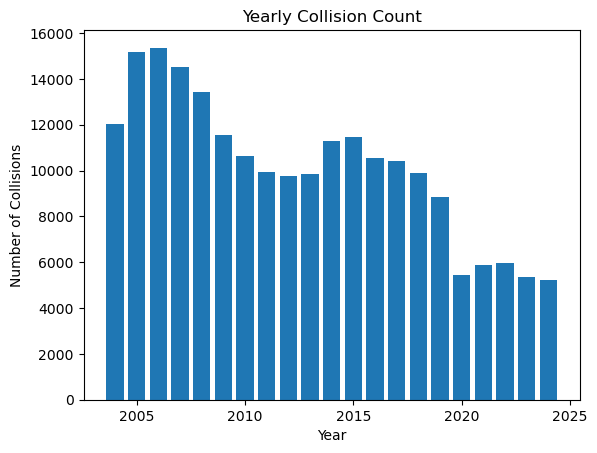

In [15]:
plt.bar(collision_per_yr.index, collision_per_yr.values, label='Yearly Collisions')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.title('Yearly Collision Count')
plt.show()

**Interpretation:**  
From 2004 to 2006, the number of collisions showed an upward trend with an approximate 3000 collision increase in 2005 and a peak in 2006 before steadily declining until 2012. Between 2013 to 2015, a similar pattern followed where collisions increased with a peak in 2015 before declining once again. A sharp drop in 2020 coincides with the COVID-19 pandemic in which the lockdown measures significantly reduced travel activity. The lower number of collisions after the year 2020 may be influenced by the expansion of the Link Light Rail system connecting North Seattle to Downtown with new stations opening in Northgate, Roosevelt and UDistrict, providing more public transportation alternatives and possibly reducing road congestion.

In [16]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# sns.countplot(data=df, x='month', ax=axes[0])
# axes[0].set_title('Collisions by month')

# sns.countplot(data=df, x='hour', ax=axes[1])
# axes[1].set_title('Collisions by hour of day')

# plt.tight_layout()
# plt.show()

### Collision Count by Month

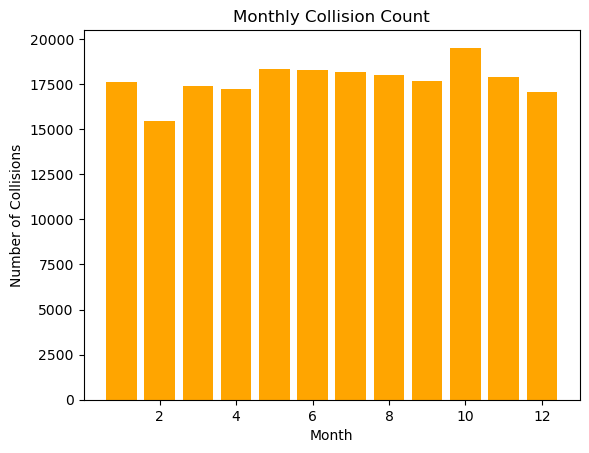

In [17]:
collision_per_mth = df.groupby('month')['collision_type'].count()
collision_per_mth

plt.bar(collision_per_mth.index, collision_per_mth.values, label='Monthly Collisions', color='orange')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.title('Monthly Collision Count')
plt.show()

**Interpretation:**  
Overall, the number of collisions per month ranges from approximately 15000 to 20000, with no major differences observed between most months. The highest number of collisions occurs in October, which may be due to the reduced daylight hours and increased rainfall as the city fully transitions into fall. On the contrary, February holds the least number of collisions, which may be due to less driving activity and greater driver caution due to winter conditions. 

When grouped by season, fall (September to November) has the highest number of collisions, followed by summer (June to August), spring (March to May) and winter (December to February). Seasonal variation is least pronounced during summer while fall has the most noticeable month-to-month changes. This suggests that daylight hours and precipitation may contribute to collision frequency.

### Collision Count by Hour

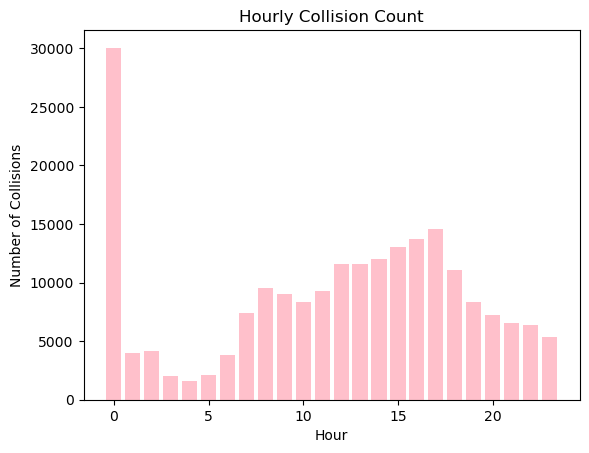

In [18]:
collision_per_hr = df.groupby('hour')['collision_type'].count()
collision_per_hr

plt.bar(collision_per_hr.index, collision_per_hr.values, label='Hourly Collisions', color='pink')
plt.xlabel('Hour')
plt.ylabel('Number of Collisions')
plt.title('Hourly Collision Count')
plt.show()

**Interpretation:**  
Overall, the number of collisions decreases steadily from 12am to 4am, before rising and reaching the first peak at 8am. After, the count decreases slightly until 10am, increases again and reaches a second peak at 5pm. After 5pm, the number of collisions decreases until 11pm.

The highest number of collisions appears at the 12am. However, this is likely due to missing or unreported times in the dataset being automatically recorded as 12am. From 1am to 5am, the number of collisions are low as due to reduced traffic at night, with the lowest numbers at 4am as most people are asleep. The sharp rise at 8am corresponds to the morning rush hour as many commute to work. A second rise happens around 12pm and peaks at 5pm, the evening rush hour when most are traveling home or doing after-work activities. This suggests collision frequency may be influenced by daily commuting habits rather than temporal variation.

## Environmental Conditions

### Conditions from dataset: weather, light condition, road condition

In [19]:
# Remove 'Unknown' values as that information adds no value to analysis
df_edit = df[~((df['weather'] == 'Unknown') | (df['light_cond'] == 'Unknown') | (df['road_cond'] == 'Unknown'))]

In [20]:
df_edit.shape

(196888, 35)

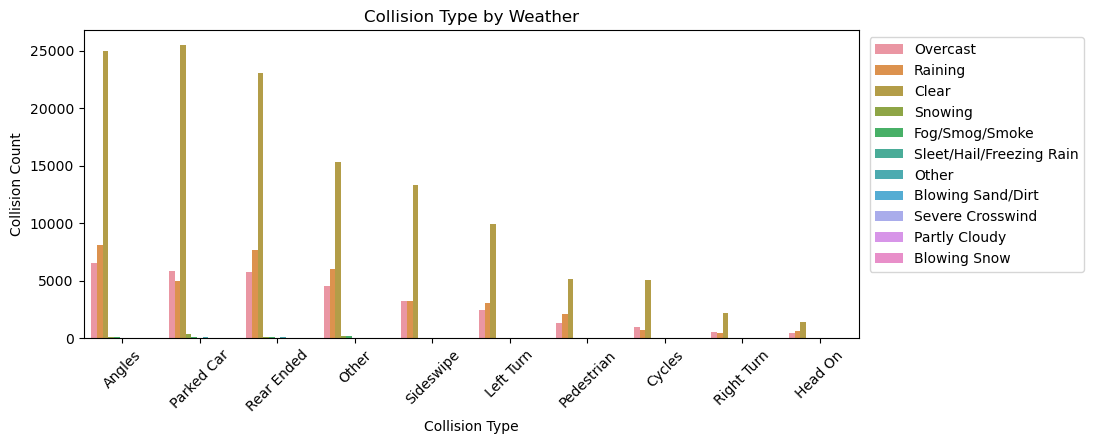

In [21]:
# Reference: https://stackoverflow.com/questions/46623583/order-categories-by-count-in-a-countplot
ax = sns.countplot(data=df_edit, x='collision_type', hue='weather', order=df_edit['collision_type'].value_counts().index)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
ax.set(xlabel='Collision Type', ylabel='Collision Count', title='Collision Type by Weather')
ax.figure.set_size_inches(10, 4)
plt.xticks(rotation=45)
plt.show()

Across all collision types, the highest number of collisions occurred under clear weather conditions. The second and third highest counts occured under overcast and rainy conditions, which alternated in rank depending on collision type. These findings likely reflect the prevalence of these weather conditions in Seattle, may be suggesting that collisions occur more frequently during common weather patterns rather than being directly caused by adverse conditions.

From the visualization, angle collisions were the most common collision type overall, followed by parked car and rear-end collisions.

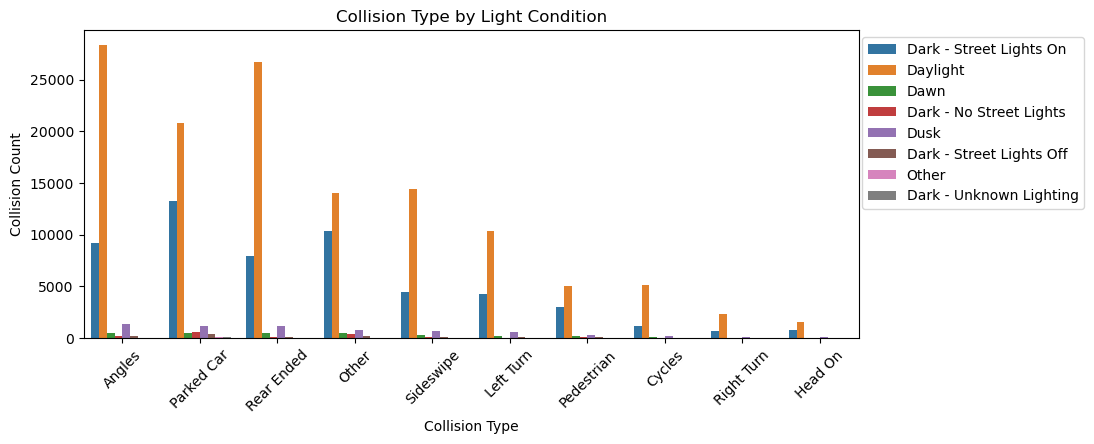

In [22]:
ax = sns.countplot(data=df_edit, x='collision_type', hue='light_cond', order=df_edit['collision_type'].value_counts().index)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
ax.set(xlabel='Collision Type', ylabel='Collision Count', title='Collision Type by Light Condition')
ax.figure.set_size_inches(10, 4)
plt.xticks(rotation=45)
plt.show()

Across all collision types, the highest number of collisions occurred during the daylight, followed by dark conditions with the street lights on. These findings likely reflect the prevalence of these light conditions in Seattle, may be suggesting that collisions occur more frequently during high light visibility conditions rather than being directly caused by adverse conditions.

From the visualization, angle collisions were the most common collision type overall, followed by parked car and rear-end collisions.

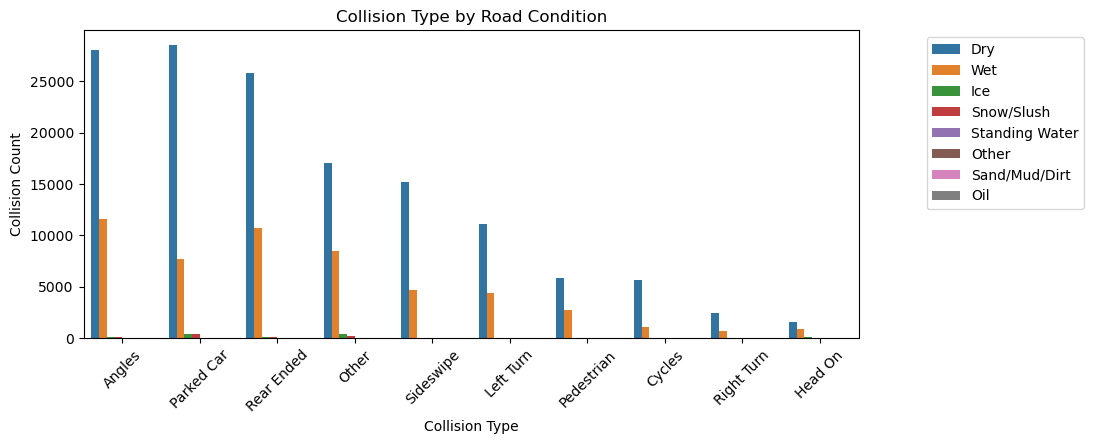

In [23]:
ax = sns.countplot(data=df_edit, x='collision_type', hue='road_cond', order=df_edit['collision_type'].value_counts().index)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
ax.set(xlabel='Collision Type', ylabel='Collision Count', title='Collision Type by Road Condition')
ax.figure.set_size_inches(10, 4)
plt.xticks(rotation=45)
plt.show()

Across all collision types, the highest number of collisions occurred during the dry road conditions, followed by wet conditions. These findings likely reflect the prevalence of these road conditions in Seattle, may be suggesting that collisions occur more frequently during common road conditions rather than being directly caused by adverse conditions.

From the visualization, angle collisions were the most common collision type overall, followed by parked car and rear-end collisions.

#### Overall Observation:  
Overall, most accidents happen during most prevalent conditions (clear, daylight, dry conditions) throughout the year for the city of Seattle. However, as these conditions are most prevalent in the city, the high collision counts may simply reflect exposure and not a greater danger. Further analysis excluding the dominating categories may help reveal how collisions behave under more adverse conditions.

## Behavioral Indicators

### Indicators from dataset: inattention, under influence, speeding

In [24]:
#plt.bar(x='collision_type', y=['inattention_ind', 'und_infl_ind', 'speeding_ind'])

In [25]:
# sns.countplot(data=df_edit, x='speeding_ind', hue='inattention_ind')
# plt.show()

In [26]:
# Understand how collision types differ between behaviors.

#### Proportion of collision types by speeding

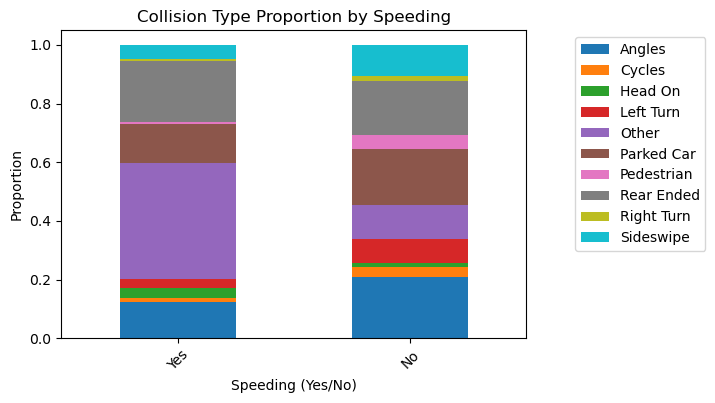

In [27]:
# Proportion of collision types by speeding
prop_df = pd.crosstab(df_edit['speeding_ind'], df_edit['collision_type'], normalize='index')
propct_df = prop_df.loc[[1, 0]] # 'Yes' appears first on plot
prop_plt = propct_df.plot(kind='bar', stacked=True, figsize=(6,4))

prop_plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
prop_plt.set(xlabel='Speeding (Yes/No)', ylabel='Proportion', title='Collision Type Proportion by Speeding')
prop_plt.set_xticklabels(['Yes', 'No'], rotation=45)
plt.show()

In [28]:
#print(prop_df)

**Interpretation:**  
The plot shows how collision types are distributed between speeding and not speeding. For collisions involving speeding, 'Other' collision types make up the largest proportion followed by rear-end, parked car and angle collisions respectively. Without speeding, angle collisions is the biggest proportion followed by parked car, rear-end and other collision types respectively. Although the same collision types take up the four highest proportions for both categories, the proportion of collisions with speeding involved is consistently higher compared to its counterpart, suggesting that speeding contributes to a higher likelihood of the most common collision types occurring compared to collisions without speeding.

#### Proportion of collision types by under influence

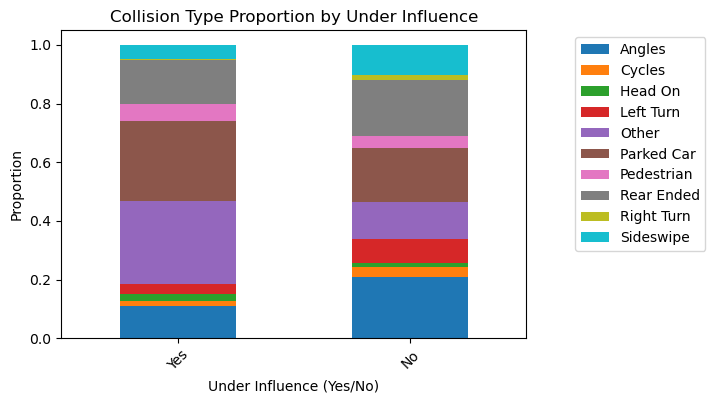

In [29]:
# Proportion of collision types by under influence
prop_df = pd.crosstab(df_edit['und_infl_ind'], df_edit['collision_type'], normalize='index')
propct_df = prop_df.loc[[1, 0]] # 'Yes' appears first on plot
prop_plt = propct_df.plot(kind='bar', stacked=True, figsize=(6,4))

prop_plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
prop_plt.set(xlabel='Under Influence (Yes/No)', ylabel='Proportion', title='Collision Type Proportion by Under Influence')
prop_plt.set_xticklabels(['Yes', 'No'], rotation=45)
plt.show()

In [30]:
#print(prop_df)

**Interpretation:**  
The plot shows how collision types are distributed between drivers being under influence and drivers not being under influence. For collisions with drivers under influence, 'Other' collision types make up the largest proportion followed by parked car, rear-end, and angle collisions respectively. Without driving under influence, angle collisions is the biggest proportion followed by rear-end, parked car and other collision types respectively. 

Compared to the cases involving drivers under the influence, the proportions of 'other' and parked car collisions are lower while rear-end and angle collisions are higher in cases without driving under influence. This suggests that driving under the influence contributes to a higher likelihood of 'other' and parked car collisions and lower likelihood of rear-end and angle collisions than cases driving without influence.

#### Proportion of collision types by inattention

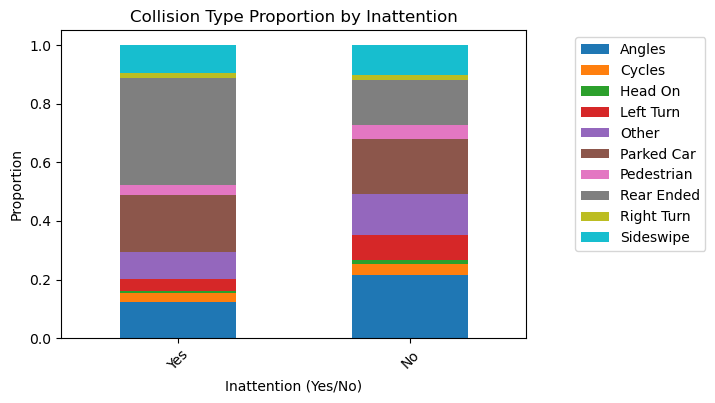

In [31]:
# Proportion of collision types by inattention
prop_df = pd.crosstab(df_edit['inattention_ind'], df_edit['collision_type'], normalize='index')
propct_df = prop_df.loc[[1, 0]] # 'Yes' appears first on plot
prop_plt = propct_df.plot(kind='bar', stacked=True, figsize=(6,4))

prop_plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
prop_plt.set(xlabel='Inattention (Yes/No)', ylabel='Proportion', title='Collision Type Proportion by Inattention')
prop_plt.set_xticklabels(['Yes', 'No'], rotation=45)
plt.show()

In [32]:
#print(prop_df)

**Interpretation:**  
The plot shows how collision types are distributed between inattention and not inattention. For collisions involving inattentive behavior, rear-end collision types make up the largest proportion followed by parked car, angle and sideswipe collisions respectively. For cases without inattention, angle collisions is the biggest proportion followed by parked car, rear-end and other collision types respectively. 

Compared to the cases with inattention, the proportions of rear-end and parked car collisions are lower while angle collisions are higher in cases not involving inattention.  This suggests that inattention contributes to a higher likelihood of rear-end and parked car collisions and lower likelihood of angle collisions than cases driving without influence. Sideswipe collisions may have a higher likelihood to occur in inattention collisions while other collision types might be more likely to occur in collisions without inattention.

#### Overall Observation:
Across all plots of the three behavior indicators, rear-end, parked car and angle are the most common collisions to occur regardless of the presence of these indicators. Parked car collisions have a higher likelihood to occur in presence of these indicators. Rear-end collisions are more likely to occur in presence of speeding and inattention while angle collisions are more likely to occur in prsence of speeding and influence. This implies that the presence of these behaviors further intensify the occurrence of the common collisions.

### Severity Analysis

Identify what factors influence the severity of a collision

Questions:  
- Which collision types are most likely to result in injury or fatality?
- How do environmental conditions (weather, light, road) impact severity?
- Do speeding, inattention, or influence correlate with higher severity?
- Are collisions at certain times or locations more severe?

In [33]:
df_edit['location'].value_counts()

location
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                    285
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST                    277
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N          276
6TH AVE AND JAMES ST                                              274
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N    269
                                                                 ... 
NE 65TH ST BETWEEN 44TH AVE NE AND 45TH AVE NE                      1
S SNOQUALMIE ST BETWEEN 29TH AVE S AND M L KING JR WR WAY S         1
15TH AVE BETWEEN E FIR ST AND E SPRUCE ST                           1
NW 64TH ST BETWEEN 26TH AVE NW AND 28TH AVE NW                      1
LINDEN AVE N BETWEEN N 40TH ST AND N 41ST ST                        1
Name: count, Length: 23436, dtype: int64

In [34]:
df_edit['severity_desc'].value_counts()

severity_desc
Property Damage Only Collision    128339
Injury Collision                   64213
Serious Injury Collision            3873
Fatality Collision                   461
Unknown                                2
Name: count, dtype: int64

In [35]:
df_edit['severity_code'].value_counts()

severity_code
1     128339
2      64213
2b      3873
3        461
0          2
Name: count, dtype: int64

In [36]:
df_edit = df_edit[~(df_edit['severity_desc'] == 'Unknown')]
df_edit['severity_desc'].value_counts()

severity_desc
Property Damage Only Collision    128339
Injury Collision                   64213
Serious Injury Collision            3873
Fatality Collision                   461
Name: count, dtype: int64

In [37]:
df_edit.shape

(196886, 35)

In [38]:
#sev_dict = dict(zip(df['severity_code'], df['severity_desc']))
#df_edit['severity'] = df_edit['severity_code'].map(sev_dict)

In [39]:
#df_edit['severity'].value_counts().index

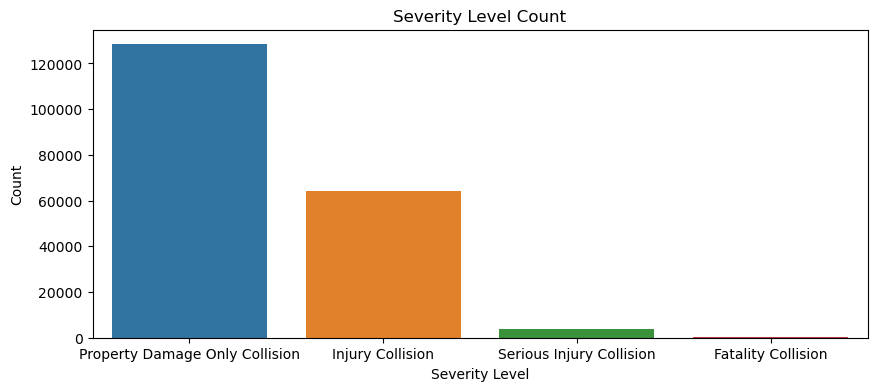

In [40]:
sevplt = sns.countplot(data=df_edit, x='severity_desc')
#sevplt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
sevplt.set(xlabel='Severity Level', ylabel='Count', title='Severity Level Count')
sevplt.figure.set_size_inches(10, 4)
plt.show()

### Severity by Collision Type

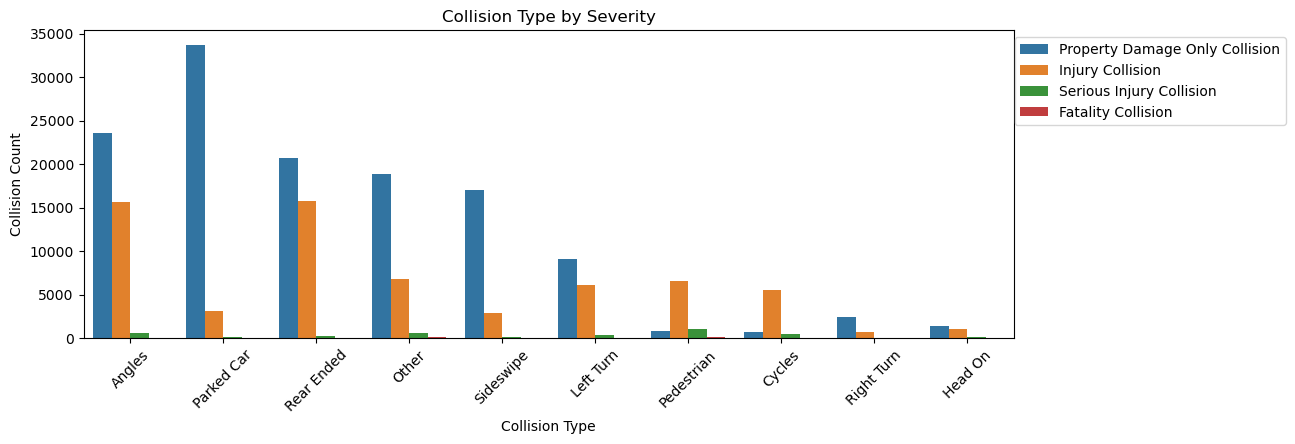

In [41]:
sevcoll_plt = sns.countplot(data=df_edit, x='collision_type', hue='severity_desc', order=df_edit['collision_type'].value_counts().index)
sevcoll_plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
sevcoll_plt.set(xlabel='Collision Type', ylabel='Collision Count', title='Collision Type by Severity')
sevcoll_plt.figure.set_size_inches(12, 4)
plt.xticks(rotation=45)
plt.show()

**Interpretation:**  
From the graph, angle, parked car, rear-end, other, sideswipe, left turn, right turn and head-on collisions resulted mostly in property damage while pedestrian and cycle collision mainly resulted in injuries.

### Severity by Environmental Conditions

#### Severity VS Weather

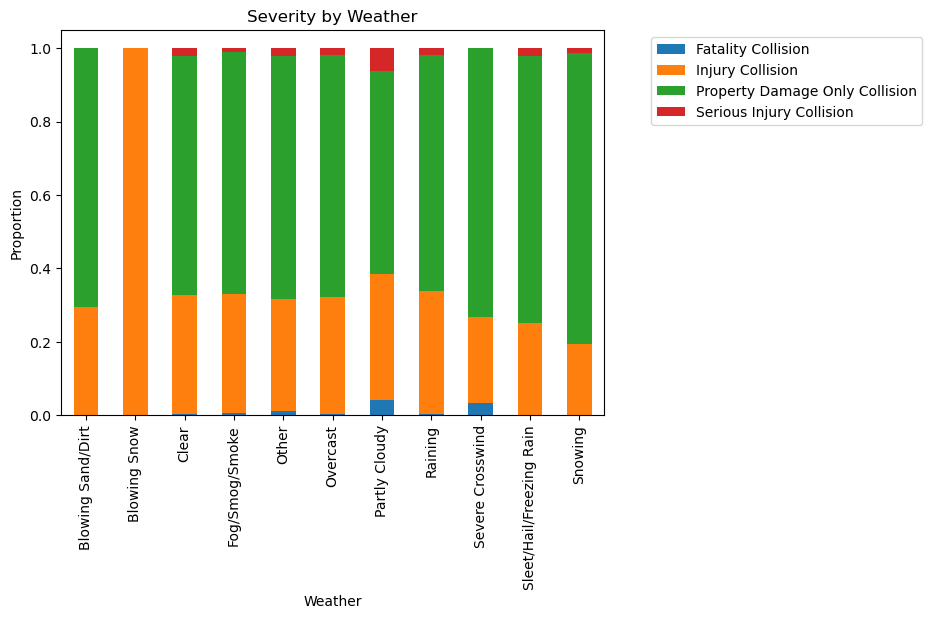

In [42]:
prop_df = pd.crosstab(df_edit['weather'], df_edit['severity_desc'], normalize='index')
prop_plt = prop_df.plot(kind='bar', stacked=True, figsize=(7,5))
prop_plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
prop_plt.set(xlabel='Weather', ylabel='Proportion', title='Severity by Weather')
plt.show()

#### Severity VS Light

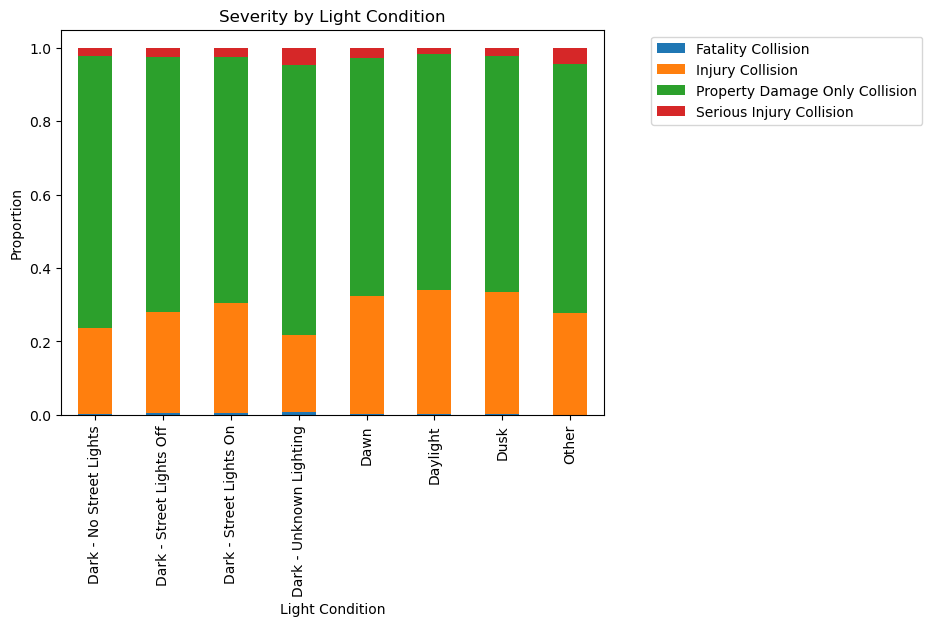

In [43]:
prop_df = pd.crosstab(df_edit['light_cond'], df_edit['severity_desc'], normalize='index')
prop_plt = prop_df.plot(kind='bar', stacked=True, figsize=(7,5))
prop_plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
prop_plt.set(xlabel='Light Condition', ylabel='Proportion', title='Severity by Light Condition')
plt.show()

#### Severity VS Road

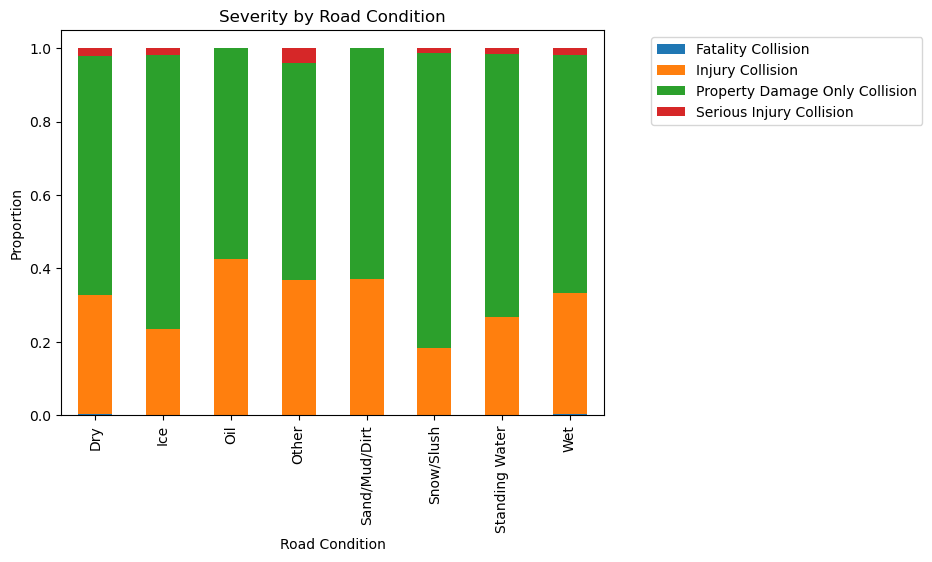

In [44]:
prop_df = pd.crosstab(df_edit['road_cond'], df_edit['severity_desc'], normalize='index')
prop_plt = prop_df.plot(kind='bar', stacked=True, figsize=(7,5))
prop_plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
prop_plt.set(xlabel='Road Condition', ylabel='Proportion', title='Severity by Road Condition')
plt.show()

### Severity by Behavior Indicators

#### Severity VS Speeding

In [45]:
df_edit['speeding_labels'] = df_edit['speeding_ind'].map({0:'No speeding', 1: 'Speeding'})

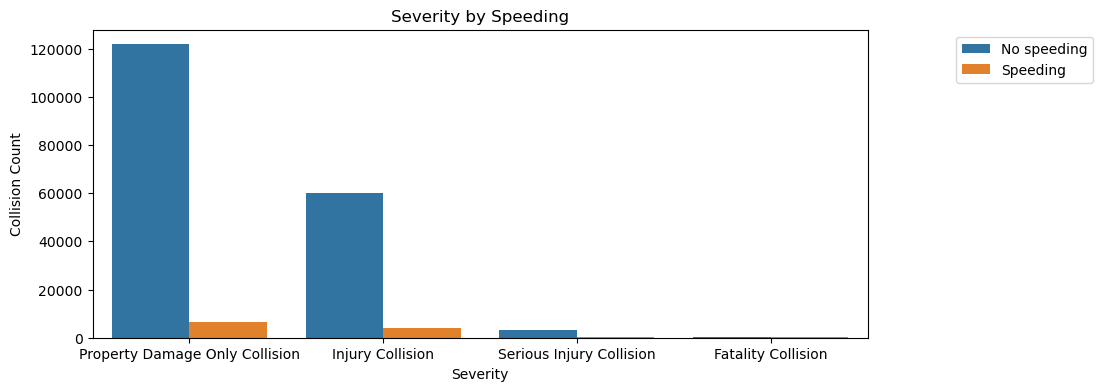

In [46]:
sev_bhv_plt = sns.countplot(data=df_edit, x='severity_desc', hue='speeding_labels')
sev_bhv_plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
sev_bhv_plt.set(xlabel='Severity', ylabel='Collision Count', title='Severity by Speeding')
sev_bhv_plt.figure.set_size_inches(10, 4)
plt.show()

#### Severity VS Influence

In [47]:
df_edit['und_infl_labels'] = df_edit['und_infl_ind'].map({0:'No influence', 1: 'Under influence'})

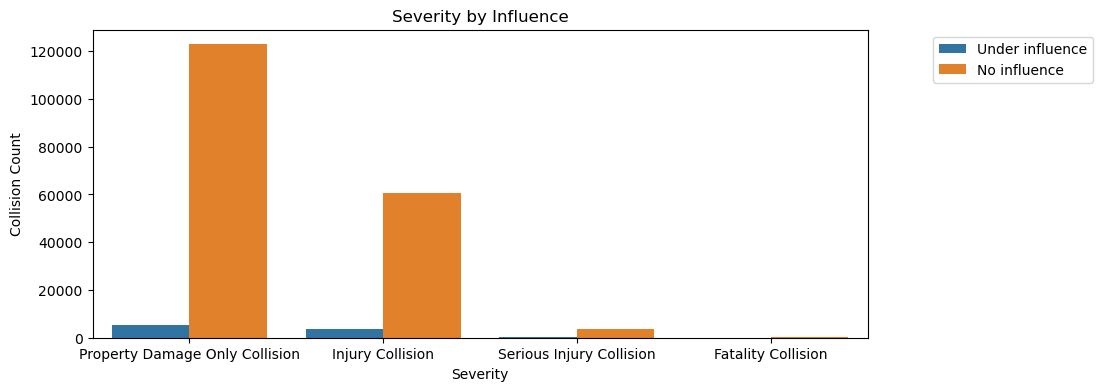

In [48]:
sev_bhv_plt = sns.countplot(data=df_edit, x='severity_desc', hue='und_infl_labels')
sev_bhv_plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
sev_bhv_plt.set(xlabel='Severity', ylabel='Collision Count', title='Severity by Influence')
sev_bhv_plt.figure.set_size_inches(10, 4)
plt.show()

#### Severity VS Inattention

In [49]:
df_edit['inattention_labels'] = df_edit['inattention_ind'].map({0:'Not inattention', 1: 'Inattention'})

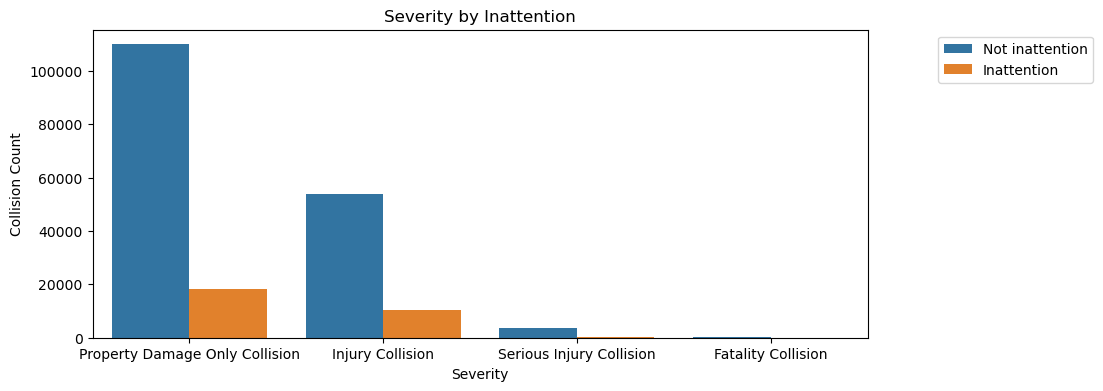

In [50]:
sev_bhv_plt = sns.countplot(data=df_edit, x='severity_desc', hue='inattention_labels')
sev_bhv_plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
sev_bhv_plt.set(xlabel='Severity', ylabel='Collision Count', title='Severity by Inattention')
sev_bhv_plt.figure.set_size_inches(10, 4)
plt.show()

### Severity by Location and Hour

#### Severity by Location

In [51]:
#severe_df = df_edit[df_edit['severity_desc'].isin(['Serious Injury Collision', 'Fatality Collision'])]

In [52]:
#severe_df.columns

In [53]:
#severe_df['junction_type'].value_counts()

In [54]:
# sns.countplot(data=severe_df, x='location')
# plt.show()

In [55]:
# top10loc = severe_df.groupby('location').size().sort_values(ascending=False).head(10)
# top10loc

In [56]:
# print(severe_df['location'].value_counts().head(20))

In [57]:
# loc_prop = severe_df.groupby('location').size() / df_edit.groupby('location').size()
# loc_prop.plot(kind='bar')
# plt.title('Proportion of Severe Collisions by Location')
# plt.show()

In [58]:
# loc_ct = severe_df['location'].value_counts()
# tenth_val = loc_ct.iloc[9]
# top10loc = loc_ct[loc_ct >= tenth_val]
# top10loc

In [59]:
# twentyfour_val = loc_ct.iloc[23]
# top24loc = loc_ct[loc_ct >= twentyfour_val]
# top24loc

In [60]:
# top10loc.plot(kind='barh')
# plt.title('Top 10 Locations Severe Collisions')
# plt.show()

In [61]:
# top24loc.plot(kind='barh')
# plt.title('Top 24 Locations Severe Collisions')
# plt.show()

In [62]:
# top10locs = top10loc.index

In [63]:
# top24locs = top24loc.index

In [64]:
# loc10df = severe_df[severe_df['location'].isin(top10locs)]
# loc10df

In [65]:
# loc24df = severe_df[severe_df['location'].isin(top24locs)]
# loc24df

In [66]:
# sevlocplt = sns.countplot(data=loc10df, x='location', hue='severity_desc')
# sevlocplt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
# sevlocplt.set(xlabel='Location', ylabel='Collision Count', title='Severity by Top 10 Locations')
# sevlocplt.figure.set_size_inches(10, 4)
# plt.xticks(rotation=90)
# plt.show()

In [67]:
# sevloc24plt = sns.countplot(data=loc24df, x='location', hue='severity_desc')
# sevloc24plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
# sevloc24plt.set(xlabel='Location', ylabel='Collision Count', title='Severity by Top 24 Locations')
# sevloc24plt.figure.set_size_inches(10, 4)
# plt.xticks(rotation=90)
# plt.show()

In [68]:
# loc_prop = loc24df.groupby('location').size() / severe_df.groupby('location').size()
# loc_prop.plot(kind='bar')
# sevloc24plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
# sevloc24plt.set(xlabel='Location', ylabel='Collision Count', title='Severity by Top 24 Locations')
# sevloc24plt.figure.set_size_inches(10, 4)
# plt.title('Proportion of Severe Collisions by Top 24 Locations')
# plt.show()

In [69]:
# make binary category for severity
df['is_severe'] = df['severity_desc'].isin(['Serious Injury Collision', 'Fatality Collision']).astype(int)

In [70]:
top24loc = df['location'].value_counts().head(24).index

In [71]:
loc_df = df[df['location'].isin(top24loc)]
loc_df

,object_id,status,address_type,location,severity_code,severity_desc,collision_type,person_ct,ped_ct,ped_cycle_ct,...,st_col_desc,seglane_key,crosswalk_key,hit_parked_car_ind,source_report_code,source_desc,year,month,hour,is_severe
58,73437269,Matched,Block,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,2,Injury Collision,Rear Ended,5,0,0,...,From same direction - both going straight - bo...,0,0,0,PTCR,Police Traffic Collision Report,2010,1,13,0
233,73437460,Matched,Block,EAST MARGINAL WAY S BETWEEN S FIDALGO ST AND 1...,1,Property Damage Only Collision,Other,1,0,0,...,Fixed object,0,0,0,PTCR,Police Traffic Collision Report,2009,2,19,0
285,73437519,Matched,Block,EAST MARGINAL WAY S BETWEEN S FIDALGO ST AND 1...,2,Injury Collision,Other,2,0,0,...,One car entering driveway access,0,0,0,PTCR,Police Traffic Collision Report,2008,3,18,0
286,73437520,Matched,Block,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,2,Injury Collision,Cycles,2,0,1,...,Vehicle - Pedalcyclist,15057,0,0,PTCR,Police Traffic Collision Report,2013,3,17,0
378,73437623,Matched,Block,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,1,Property Damage Only Collision,Sideswipe,2,0,0,...,From same direction - both going straight - on...,0,0,0,PTCR,Police Traffic Collision Report,2004,7,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214670,73694345,Matched,Block,EAST MARGINAL WAY S BETWEEN S FIDALGO ST AND 1...,1,Property Damage Only Collision,Right Turn,3,0,0,...,From same direction - one right turn - one str...,0,0,0,PTCR,Police Traffic Collision Report,2023,5,16,0
214691,73694374,Matched,Block,RAINIER AVE S BETWEEN S DEARBORN ST AND S CHAR...,1,Property Damage Only Collision,Sideswipe,2,0,0,...,From same direction - both going straight - bo...,0,0,0,PTCR,Police Traffic Collision Report,2023,2,13,0
214708,73694393,Matched,Block,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,1,Property Damage Only Collision,Sideswipe,3,0,0,...,From same direction - both going straight - on...,0,0,0,PTCR,Police Traffic Collision Report,2023,4,12,0
214779,73694488,Matched,Block,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,2,Injury Collision,Other,1,0,0,...,Fixed object,0,0,0,PTCR,Police Traffic Collision Report,2023,6,5,0


In [72]:
loc_prop = loc_df.groupby('location')['is_severe'].mean().sort_values(ascending=False)
#loc_prop = loc_df.groupby('location')['is_severe'].mean().sort_values(ascending=False)

C:\Users\mai\AppData\Local\Temp\ipykernel_19956\1609088809.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


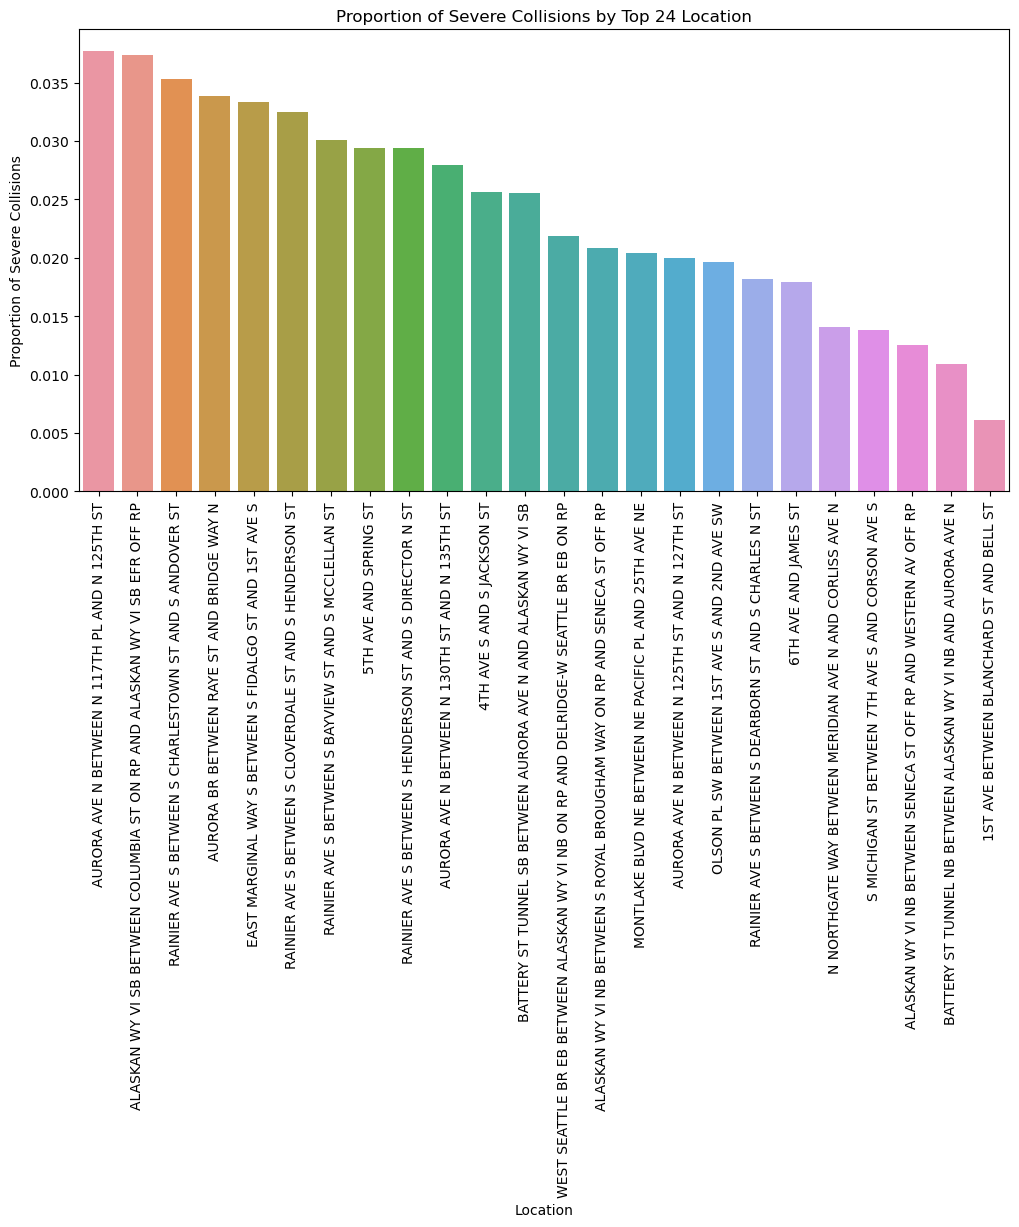

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(data=loc_df, x=loc_prop.index, y=loc_prop.values)
plt.xticks(rotation=90)
plt.title('Proportion of Severe Collisions by Top 24 Location')
plt.xlabel('Location')
plt.ylabel('Proportion of Severe Collisions')
plt.tight_layout()
plt.show()

In [74]:
# loc_prop.plot(kind='bar')
# plt.figure(figsize=(12, 6))
# plt.title('Proportion of Severe Collisions by Hour')
# plt.show()

In [76]:
hour_prop = df.groupby('hour')['is_severe'].mean().sort_values(ascending=False)

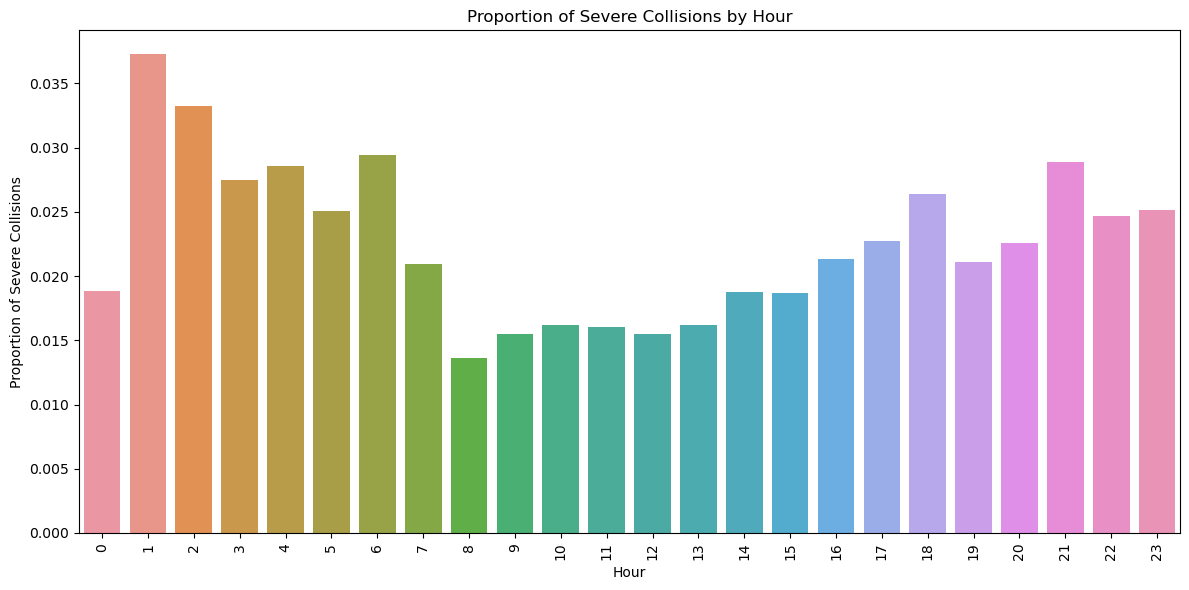

In [77]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x=hour_prop.index, y=hour_prop.values)
plt.xticks(rotation=90)
plt.title('Proportion of Severe Collisions by Hour')
plt.xlabel('Hour')
plt.ylabel('Proportion of Severe Collisions')
plt.tight_layout()
plt.show()

In [75]:
hour_prop = severe_df.groupby('hour').size() / df_edit.groupby('hour').size()
hour_prop.plot(kind='bar')
plt.title('Proportion of Severe Collisions by Hour')
plt.show()

NameError: name 'severe_df' is not defined